In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/train_logs_clean.csv")
df['activity'] = df['activity'].apply(
    lambda x: "Move" if x.startswith("Move From") else x
)
df.head()

,Unnamed: 0,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,id_encoded
0,0,001519c8,1,60147.0,60238.0,91,Input,q,q,q,1,1,0
1,1,001519c8,2,60657.0,60784.0,127,Input,q,q,q,2,1,0
2,2,001519c8,3,60757.0,60861.0,104,Input,q,q,q,3,1,0
3,3,001519c8,4,60930.0,61057.0,127,Input,q,q,q,4,1,0
4,4,001519c8,5,61120.0,61227.0,107,Input,q,q,q,5,1,0


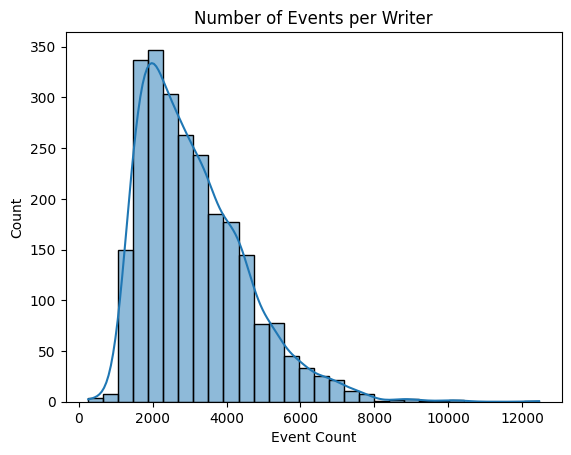

In [39]:
event_counts = df.groupby("id").size()

sns.histplot(event_counts, bins=30, kde=True)
plt.title("Number of Events per Writer")
plt.xlabel("Event Count")
plt.savefig("../data_visualization/graph/Number_of_Events_per_Writer.png")
plt.show()

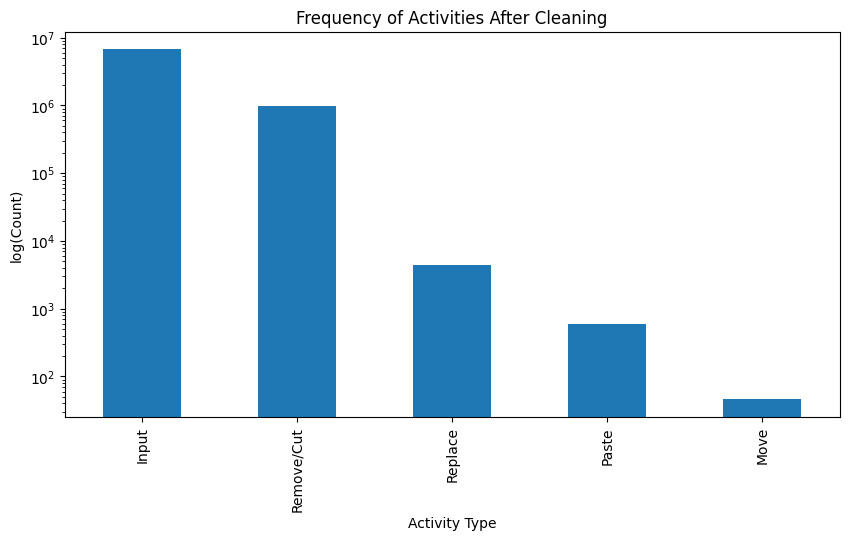

In [46]:
counts = df['activity'].value_counts()

counts.plot(kind='bar', figsize=(10,5), logy=True)

plt.title("Frequency of Activities After Cleaning")
plt.ylabel("log(Count)")
plt.xlabel("Activity Type")
plt.savefig("../data_visualization/graph/Frequency_of_Activities.png", dpi=300, bbox_inches='tight')
plt.show()


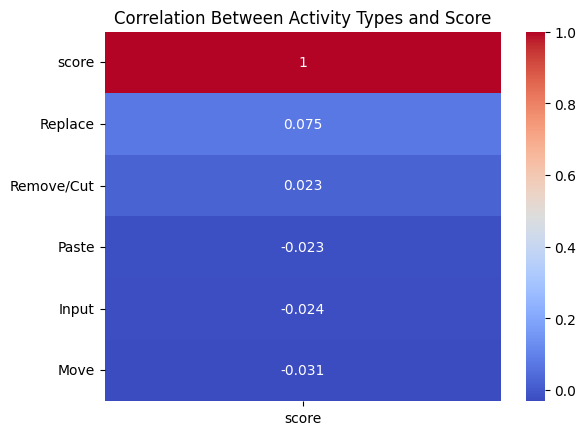

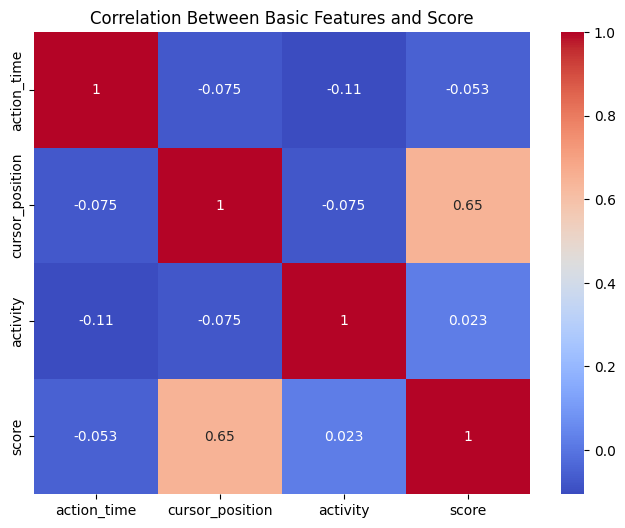

In [41]:
activity_ratio = df.groupby(["id", "activity"]).size().unstack(fill_value=0)
activity_ratio = activity_ratio.div(activity_ratio.sum(axis=1), axis=0)


scores = pd.read_csv("../data/train_scores.csv")
merged = activity_ratio.merge(scores, on="id")

corr = merged.drop(columns=['id']).corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr[['score']].sort_values('score', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation Between Activity Types and Score")
plt.savefig("../data_visualization/graph/Correlation_Between_Activity_Types_and_Score.png", dpi=300, bbox_inches='tight')
plt.show()

features = df.groupby("id").agg({
    "action_time": "mean",
    "cursor_position": "max",
    "activity": lambda x: (x=="Remove/Cut").mean()
})

features = features.merge(scores, on="id")

numeric = features.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Basic Features and Score")
plt.savefig("../data_visualization/graph/Correlation_Between_Basic_Features_and_Score.png", dpi=300, bbox_inches='tight')
plt.show()

writing score is strongly associated with text length (cursor position), while basic typing behaviors like key press duration and deletion frequency have almost no linear relationship with the final score.